In [1]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping,LearningRateScheduler
import numpy as np
import tensorflow
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, BatchNormalization

In [2]:
import tensorflow 

# CNN 1

In [72]:
model_2 = Sequential()
model_2.add(Conv2D(128, kernel_size=(3, 3),activation='relu',input_shape=(128, 128, 3)))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(32, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(2, activation='softmax'))
model_2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [73]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 63, 63, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 61, 61, 64)        73792     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 32)       

In [3]:
train_data_dir = r"C:/Users/HP/siim/testandtrain/train"
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        shuffle = True,
                        target_size=(128,128),
                        batch_size=batch_size,
                        class_mode='categorical')

Found 16047 images belonging to 2 classes.


In [4]:
test_data_dir = r'C:/Users/HP/siim/testandtrain/test'
batch_size = 32
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        shuffle = True,
                        target_size=(128,128),
                        batch_size=batch_size,
                        class_mode='categorical')

Found 1877 images belonging to 2 classes.


In [78]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

In [79]:
train_size = train_generator.n
test_size = test_generator.n

steps_per_epoch = train_size // batch_size
validation_steps =  test_size // batch_size

In [80]:
history = model_2.fit(train_generator, validation_data=test_generator, batch_size = 32, epochs=15)

Epoch 1/15
502/502 [==============================] - 906s 2s/step - loss: 0.2542 - accuracy: 0.9012 - val_loss: 0.5385 - val_accuracy: 0.7762
Epoch 2/15
502/502 [==============================] - 1023s 2s/step - loss: 0.2004 - accuracy: 0.9242 - val_loss: 0.0696 - val_accuracy: 0.9824
Epoch 3/15
502/502 [==============================] - 1095s 2s/step - loss: 0.1785 - accuracy: 0.9331 - val_loss: 0.0926 - val_accuracy: 0.9675
Epoch 4/15
502/502 [==============================] - 709s 1s/step - loss: 0.1683 - accuracy: 0.9366 - val_loss: 0.0706 - val_accuracy: 0.9824
Epoch 5/15
502/502 [==============================] - 929s 2s/step - loss: 0.1637 - accuracy: 0.9389 - val_loss: 0.1363 - val_accuracy: 0.9696
Epoch 6/15
502/502 [==============================] - 677s 1s/step - loss: 0.1461 - accuracy: 0.9451 - val_loss: 0.2981 - val_accuracy: 0.8934
Epoch 7/15
502/502 [==============================] - 673s 1s/step - loss: 0.1423 - accuracy: 0.9470 - val_loss: 0.0808 - val_accuracy: 0.97

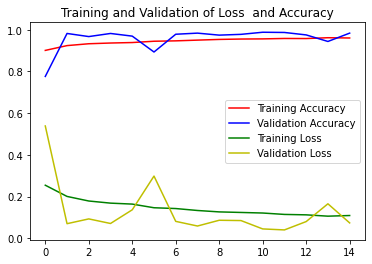

In [97]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [98]:
model_2.save("pneumo-1.h5")

In [129]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test/yes_path'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model_2.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model_2.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (3477, 128, 128, 3)
Total number of labels: (3477, 2)
109/109 [==============================] - 40s 370ms/step - loss: 0.2975 - accuracy: 0.8873
Loss on test set:  0.2975236177444458
Accuracy on test set:  0.8872591257095337
(3477,)
(3477,)


array([[1849,   27],
       [ 365, 1236]], dtype=int64)

# CNN 2

In [104]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu',input_shape=(128,128,3))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.50))
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding= 'same')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(Dense(units = 512, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 63, 63, 128)       0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 63, 63, 128)       512       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 64)        73792     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 64)      

In [105]:
history1 = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
502/502 [==============================] - 928s 2s/step - loss: 0.2839 - accuracy: 0.8880 - val_loss: 0.3272 - val_accuracy: 0.8988
Epoch 2/15
502/502 [==============================] - 932s 2s/step - loss: 0.2275 - accuracy: 0.9155 - val_loss: 0.2136 - val_accuracy: 0.9648
Epoch 3/15
502/502 [==============================] - 934s 2s/step - loss: 0.2088 - accuracy: 0.9225 - val_loss: 0.1057 - val_accuracy: 0.9755
Epoch 4/15
502/502 [==============================] - 929s 2s/step - loss: 0.1849 - accuracy: 0.9317 - val_loss: 0.1136 - val_accuracy: 0.9787
Epoch 5/15
502/502 [==============================] - 927s 2s/step - loss: 0.1795 - accuracy: 0.9351 - val_loss: 0.1313 - val_accuracy: 0.9648
Epoch 6/15
502/502 [==============================] - 930s 2s/step - loss: 0.1632 - accuracy: 0.9387 - val_loss: 0.1479 - val_accuracy: 0.9691
Epoch 7/15
502/502 [==============================] - 910s 2s/step - loss: 0.1568 - accuracy: 0.9445 - val_loss: 0.0795 - val_accuracy: 0.9728

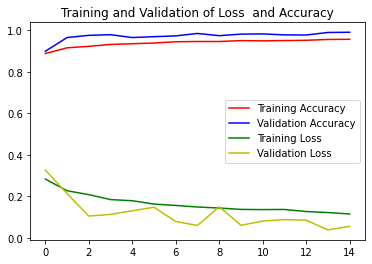

In [106]:
accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [107]:
model.evaluate(test_generator)

59/59 [==============================] - 35s 594ms/step - loss: 0.0561 - accuracy: 0.9904


[0.056099291890859604, 0.9904102087020874]

In [128]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test/yes_path'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score = model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (3477, 128, 128, 3)
Total number of labels: (3477, 2)
109/109 [==============================] - 69s 630ms/step - loss: 0.2432 - accuracy: 0.8962
Loss on test set:  0.24324862658977509
Accuracy on test set:  0.8961748480796814
(3477,)
(3477,)


array([[1855,   21],
       [ 340, 1261]], dtype=int64)

# VGG19

In [173]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Input
input_tensor = Input(shape=(128, 128, 3))
vggmodel19 = VGG19(weights='imagenet', include_top=False, input_shape = (128,128,3))

In [174]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
vggmodel191 =Sequential()
vggmodel191.add(Flatten())
vggmodel191.add(Dense(units=4096,activation='relu'))
vggmodel191.add(Dense(units=4096,activation='relu'))
vggmodel191.add(Dense(units=1000,activation='relu'))
vggmodel191.add(Dense(units=2,activation='softmax'))
vggmodel19_new = Model(inputs = vggmodel19.input, outputs= vggmodel191(vggmodel19.output))
vggmodel19_new.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)      

In [175]:
for layers in (vggmodel19_new.layers)[:21]:
    print(layers)
    layers.trainable = False

In [176]:
vgg19model =vggmodel19_new 

In [177]:
vgg19model.compile(loss ="categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [178]:
vgg19model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)      

In [180]:
history = vgg19model.fit(train_generator, validation_data=test_generator, batch_size = 32,epochs=15)

Epoch 1/15
502/502 [==============================] - 1458s 3s/step - loss: 0.1961 - accuracy: 0.9217 - val_loss: 0.0328 - val_accuracy: 0.9909
Epoch 2/15
502/502 [==============================] - 1519s 3s/step - loss: 0.1722 - accuracy: 0.9329 - val_loss: 0.0282 - val_accuracy: 0.9925
Epoch 3/15
502/502 [==============================] - 1646s 3s/step - loss: 0.1501 - accuracy: 0.9441 - val_loss: 0.0462 - val_accuracy: 0.9888
Epoch 4/15
502/502 [==============================] - 1638s 3s/step - loss: 0.1507 - accuracy: 0.9457 - val_loss: 0.0579 - val_accuracy: 0.9899
Epoch 5/15
502/502 [==============================] - 1521s 3s/step - loss: 0.1383 - accuracy: 0.9483 - val_loss: 0.0673 - val_accuracy: 0.9845
Epoch 6/15
502/502 [==============================] - 1522s 3s/step - loss: 0.1338 - accuracy: 0.9498 - val_loss: 0.1135 - val_accuracy: 0.9723
Epoch 7/15
502/502 [==============================] - 1529s 3s/step - loss: 0.1240 - accuracy: 0.9536 - val_loss: 0.1110 - val_accuracy:

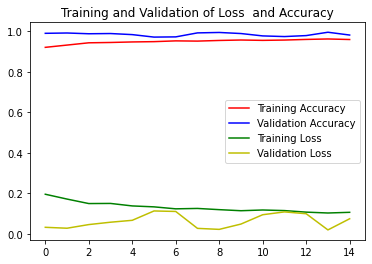

In [181]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')

plt.title('Training and Validation of Loss  and Accuracy')
plt.legend()
plt.show()

In [182]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test/yes_path'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)

test_loss, test_score =  vgg19model.evaluate(testing_data, testing_labels, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)


preds = vgg19model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (3477, 128, 128, 3)
Total number of labels: (3477, 2)
109/109 [==============================] - 242s 2s/step - loss: 0.1968 - accuracy: 0.9195
Loss on test set:  0.1968020796775818
Accuracy on test set:  0.9194707870483398
(3477,)
(3477,)


array([[1840,   36],
       [ 244, 1357]], dtype=int64)

In [184]:
3197/3477

0.9194708081679609

In [118]:
from tensorflow.keras import regularizers
import tensorflow as tf
import tensorflow.keras.backend as K
def precision(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# CNN 3

In [119]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name="Adam")

model_4 = Sequential()
model_4.add(Conv2D(256, kernel_size=(3, 3),activation='relu',input_shape=(128, 128, 3)))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.50))
model_4.add(Conv2D(128, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(32, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Flatten())
model_4.add(Dense(1024, activation='relu'))
model_4.add(Dense(512, activation='relu'))
model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(2, activation='softmax'))
model_4.compile(loss="categorical_crossentropy",optimizer=opt,metrics=['accuracy', recall,precision])

In [120]:
model_4.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 126, 126, 256)     7168      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 63, 63, 256)       0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 63, 63, 256)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 61, 61, 128)       295040    
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 128)       512       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 28, 28, 64)      

In [122]:
history = model_4.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
502/502 [==============================] - 1504s 3s/step - loss: 0.2348 - accuracy: 0.9112 - recall: 0.9113 - precision: 0.9113 - val_loss: 0.3010 - val_accuracy: 0.8876 - val_recall: 0.8874 - val_precision: 0.8874
Epoch 2/15
502/502 [==============================] - 1643s 3s/step - loss: 0.2075 - accuracy: 0.9203 - recall: 0.9204 - precision: 0.9204 - val_loss: 0.1699 - val_accuracy: 0.9515 - val_recall: 0.9518 - val_precision: 0.9518
Epoch 3/15
502/502 [==============================] - 1633s 3s/step - loss: 0.1994 - accuracy: 0.9267 - recall: 0.9268 - precision: 0.9268 - val_loss: 0.1979 - val_accuracy: 0.9510 - val_recall: 0.9504 - val_precision: 0.9504
Epoch 4/15
502/502 [==============================] - 1637s 3s/step - loss: 0.1892 - accuracy: 0.9300 - recall: 0.9301 - precision: 0.9301 - val_loss: 0.2176 - val_accuracy: 0.9121 - val_recall: 0.9123 - val_precision: 0.9123
Epoch 5/15
502/502 [==============================] - 1627s 3s/step - loss: 0.1762 - accuracy: 0

In [125]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test/yes_path'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)



preds = model_4.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (3477, 128, 128, 3)
Total number of labels: (3477, 2)
(3477,)
(3477,)


array([[1845,   31],
       [ 393, 1208]], dtype=int64)

In [126]:
1845+1208

3053

In [127]:
3053/3477

0.8780557952257694

In [139]:
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2

# CNN 4

In [140]:
model =Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(128,128,3),kernel_regularizer=l1(0.0001), bias_regularizer=l2(0.01))) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (6, 6), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (6, 6),padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(layers.Conv2D(256, (6, 6), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 256,  activation = 'relu'))
model.add(Dense(units = 128,  activation = 'relu'))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 25, 25, 64)        73792     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 12, 12, 64)      

In [141]:
history = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
502/502 [==============================] - 419s 835ms/step - loss: 0.3174 - accuracy: 0.8737 - val_loss: 0.4098 - val_accuracy: 0.8375
Epoch 2/15
502/502 [==============================] - 360s 716ms/step - loss: 0.2482 - accuracy: 0.9079 - val_loss: 0.1981 - val_accuracy: 0.9595
Epoch 3/15
502/502 [==============================] - 343s 683ms/step - loss: 0.2383 - accuracy: 0.9116 - val_loss: 1.3522 - val_accuracy: 5.3277e-04
Epoch 4/15
502/502 [==============================] - 337s 671ms/step - loss: 0.2216 - accuracy: 0.9187 - val_loss: 0.3520 - val_accuracy: 0.8791
Epoch 5/15
502/502 [==============================] - 330s 657ms/step - loss: 0.2013 - accuracy: 0.9242 - val_loss: 0.0693 - val_accuracy: 0.9814
Epoch 6/15
502/502 [==============================] - 337s 672ms/step - loss: 0.1947 - accuracy: 0.9299 - val_loss: 0.9341 - val_accuracy: 0.6042
Epoch 7/15
502/502 [==============================] - 331s 660ms/step - loss: 0.1971 - accuracy: 0.9258 - val_loss: 0.17

In [142]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test/yes_path'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)



preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (3477, 128, 128, 3)
Total number of labels: (3477, 2)
(3477,)
(3477,)


array([[1824,   52],
       [ 293, 1308]], dtype=int64)

In [59]:
(1824+1308)/3477

0.9007765314926661

# CNN5

In [146]:
model =Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(128,128,3),kernel_regularizer=l1(0.0001), bias_regularizer=l2(0.01))) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3, 3),padding = 'same', activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Conv2D(256, (3, 3), padding = 'same',activation='relu')) #secondlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(layers.Flatten())

model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dense(units = 512,  activation = 'relu'))
model.add(Dense(units = 256,  activation = 'relu'))
model.add(Dense(units = 128,  activation = 'relu'))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 15, 15, 64)      

In [147]:
history = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
502/502 [==============================] - 269s 536ms/step - loss: 0.3125 - accuracy: 0.8760 - val_loss: 0.2979 - val_accuracy: 0.9393
Epoch 2/15
502/502 [==============================] - 330s 657ms/step - loss: 0.2487 - accuracy: 0.9075 - val_loss: 0.2720 - val_accuracy: 0.9036
Epoch 3/15
502/502 [==============================] - 337s 671ms/step - loss: 0.2249 - accuracy: 0.9174 - val_loss: 0.2874 - val_accuracy: 0.9126
Epoch 4/15
502/502 [==============================] - 347s 691ms/step - loss: 0.2068 - accuracy: 0.9254 - val_loss: 0.3128 - val_accuracy: 0.9249
Epoch 5/15
502/502 [==============================] - 337s 671ms/step - loss: 0.1977 - accuracy: 0.9295 - val_loss: 0.0675 - val_accuracy: 0.9776
Epoch 6/15
502/502 [==============================] - 325s 648ms/step - loss: 0.1793 - accuracy: 0.9351 - val_loss: 0.4719 - val_accuracy: 0.8039
Epoch 7/15
502/502 [==============================] - 327s 651ms/step - loss: 0.1690 - accuracy: 0.9373 - val_loss: 0.0642 -

In [148]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test/yes_path'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)



preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (3477, 128, 128, 3)
Total number of labels: (3477, 2)
(3477,)
(3477,)


array([[1853,   23],
       [ 286, 1315]], dtype=int64)

In [60]:
(1853+1315)/3477

0.911130284728214

# CNN 6

In [151]:
model = Sequential()
model.add(Conv2D(64,(3,3), input_shape = (128,128,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(256,(6,6)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(512,(6,6)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (4,4)))

model.add(Flatten())
model.add(Dense(units=1024, activation = 'relu'))
model.add(Dense(units=512, activation = 'relu'))
model.add(Dense(units=256, activation = 'relu'))
model.add(Dense(units=128, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=16, activation = 'relu'))
model.add(Dense(2, activation="softmax"))
opt = Adam(lr=1e-5)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 61, 61, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 128)       0         
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 25, 25, 256)     

In [152]:
history = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
502/502 [==============================] - 1158s 2s/step - loss: 0.4683 - accuracy: 0.7606 - val_loss: 0.2159 - val_accuracy: 0.9489
Epoch 2/15
502/502 [==============================] - 1347s 3s/step - loss: 0.2955 - accuracy: 0.8812 - val_loss: 0.1515 - val_accuracy: 0.9632
Epoch 3/15
502/502 [==============================] - 1345s 3s/step - loss: 0.2785 - accuracy: 0.8875 - val_loss: 0.1937 - val_accuracy: 0.9467
Epoch 4/15
502/502 [==============================] - 1602s 3s/step - loss: 0.2663 - accuracy: 0.8929 - val_loss: 0.2384 - val_accuracy: 0.9286
Epoch 5/15
502/502 [==============================] - 1318s 3s/step - loss: 0.2601 - accuracy: 0.8954 - val_loss: 0.3389 - val_accuracy: 0.8812
Epoch 6/15
502/502 [==============================] - 1289s 3s/step - loss: 0.2470 - accuracy: 0.9016 - val_loss: 0.1494 - val_accuracy: 0.9579
Epoch 7/15
502/502 [==============================] - 1297s 3s/step - loss: 0.2385 - accuracy: 0.9039 - val_loss: 0.2714 - val_accuracy:

In [153]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test/yes_path'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)



preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (3477, 128, 128, 3)
Total number of labels: (3477, 2)
(3477,)
(3477,)


array([[1719,  157],
       [ 325, 1276]], dtype=int64)

# CNN7

In [168]:
model =Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(128,128,3),kernel_regularizer=l1(0.0001), bias_regularizer=l2(0.01))) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3, 3),padding = 'same', activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3),padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(256, (3,3),padding = 'same',activation='relu')) #firstlayer
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(layers.Flatten())

model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dense(units = 512,  activation = 'relu'))
model.add(Dense(units = 256,  activation = 'relu'))
model.add(Dense(units = 128,  activation = 'relu'))
model.add(Dense(units = 64,  activation = 'relu'))
model.add(Dense(units = 32,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 16,  activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_177 (Conv2D)          (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_171 (MaxPoolin (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_172 (MaxPoolin (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_53 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_173 (MaxPoolin (None, 15, 15, 64)      

In [169]:
history = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
502/502 [==============================] - 244s 485ms/step - loss: 0.2870 - accuracy: 0.8883 - val_loss: 0.1754 - val_accuracy: 0.9643
Epoch 2/15
502/502 [==============================] - 249s 495ms/step - loss: 0.2263 - accuracy: 0.9171 - val_loss: 0.0909 - val_accuracy: 0.9856
Epoch 3/15
502/502 [==============================] - 286s 569ms/step - loss: 0.2032 - accuracy: 0.9258 - val_loss: 0.2102 - val_accuracy: 0.9441
Epoch 4/15
502/502 [==============================] - 296s 590ms/step - loss: 0.1871 - accuracy: 0.9315 - val_loss: 0.2815 - val_accuracy: 0.9041
Epoch 5/15
502/502 [==============================] - 299s 596ms/step - loss: 0.1718 - accuracy: 0.9385 - val_loss: 0.0934 - val_accuracy: 0.9845
Epoch 6/15
502/502 [==============================] - 299s 596ms/step - loss: 0.1636 - accuracy: 0.9426 - val_loss: 0.4129 - val_accuracy: 0.8700
Epoch 7/15
502/502 [==============================] - 301s 599ms/step - loss: 0.1705 - accuracy: 0.9429 - val_loss: 1.1545 -

In [170]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test/yes_path'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)



preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (3477, 128, 128, 3)
Total number of labels: (3477, 2)
(3477,)
(3477,)


array([[1802,   74],
       [ 231, 1370]], dtype=int64)

In [171]:
1802+1370

3172

In [172]:
3172/3477


0.9122807017543859

In [197]:
tf.keras.applications.NASNetLarge(
    input_shape=None,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
)

359751680/359748576 [==============================] - 127s 0us/step


In [199]:
# re-size all the images to this
IMAGE_SIZE = [128, 128]

NASNetLarge = tf.keras.applications.NASNetLarge(
    input_shape=None,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
)

# don't train existing weights
for layer in NASNetLarge.layers:
  layer.trainable = False

In [203]:
from tensorflow.keras.models import Model

x = Flatten()(NASNetLarge.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs= NASNetLarge.input, outputs=prediction)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_9[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_524 (Activation)     (None, 165, 165, 96) 0           stem_bn1[0][0]                   
_______________________________________________________________________________________

separable_conv_1_reduction_righ (None, 11, 11, 672)  484512      separable_conv_1_pad_reduction_ri
__________________________________________________________________________________________________
separable_conv_1_pad_reduction_ (None, 25, 25, 672)  0           activation_708[0][0]             
__________________________________________________________________________________________________
activation_710 (Activation)     (None, 11, 11, 672)  0           reduction_add_1_reduce_12[0][0]  
__________________________________________________________________________________________________
separable_conv_1_bn_reduction_r (None, 11, 11, 672)  2688        separable_conv_1_reduction_right2
__________________________________________________________________________________________________
separable_conv_1_reduction_righ (None, 11, 11, 672)  468384      separable_conv_1_pad_reduction_ri
__________________________________________________________________________________________________
separable_

In [205]:
history  = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
502/502 [==============================] - 1898s 4s/step - loss: 0.6679 - accuracy: 0.6073 - val_loss: 0.6812 - val_accuracy: 0.5892
Epoch 2/15
502/502 [==============================] - 1956s 4s/step - loss: 0.6339 - accuracy: 0.6336 - val_loss: 0.6722 - val_accuracy: 0.6137
Epoch 3/15
502/502 [==============================] - 1963s 4s/step - loss: 0.6134 - accuracy: 0.6511 - val_loss: 0.6718 - val_accuracy: 0.6329
Epoch 4/15
502/502 [==============================] - 1959s 4s/step - loss: 0.6010 - accuracy: 0.6598 - val_loss: 0.6435 - val_accuracy: 0.7975
Epoch 5/15
502/502 [==============================] - 1951s 4s/step - loss: 0.5898 - accuracy: 0.6771 - val_loss: 0.6385 - val_accuracy: 0.8178
Epoch 6/15
502/502 [==============================] - 1941s 4s/step - loss: 0.5841 - accuracy: 0.6842 - val_loss: 0.6220 - val_accuracy: 0.8492
Epoch 7/15
502/502 [==============================] - 1923s 4s/step - loss: 0.5751 - accuracy: 0.6950 - val_loss: 0.5947 - val_accuracy:

In [206]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test/yes_path'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)



preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (3477, 128, 128, 3)
Total number of labels: (3477, 2)
(3477,)
(3477,)


array([[1698,  178],
       [ 717,  884]], dtype=int64)

In [61]:
(1698+884)/3477

0.7425941903940179

In [4]:

# re-size all the images to this
IMAGE_SIZE = [128, 128]

densenet121 = tensorflow.keras.applications.DenseNet121(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000)

# don't train existing weights
for layer in densenet121.layers:
  layer.trainable = False

33193984/33188688 [==============================] - 23s 1us/step


In [6]:
from tensorflow.keras.models import Model
x = Flatten()(densenet121.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=densenet121.input, outputs=prediction)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [10]:
history  = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
502/502 [==============================] - 649s 1s/step - loss: 0.6220 - accuracy: 0.7628 - val_loss: 0.6149 - val_accuracy: 0.7299
Epoch 2/15
502/502 [==============================] - 592s 1s/step - loss: 0.5360 - accuracy: 0.7795 - val_loss: 0.5660 - val_accuracy: 0.7448
Epoch 3/15
502/502 [==============================] - 548s 1s/step - loss: 0.5008 - accuracy: 0.7769 - val_loss: 0.5457 - val_accuracy: 0.7528
Epoch 4/15
502/502 [==============================] - 545s 1s/step - loss: 0.4815 - accuracy: 0.7824 - val_loss: 0.5311 - val_accuracy: 0.7619
Epoch 5/15
502/502 [==============================] - 545s 1s/step - loss: 0.4763 - accuracy: 0.7805 - val_loss: 0.5232 - val_accuracy: 0.7677
Epoch 6/15
502/502 [==============================] - 556s 1s/step - loss: 0.4700 - accuracy: 0.7836 - val_loss: 0.5276 - val_accuracy: 0.7704
Epoch 7/15
502/502 [==============================] - 633s 1s/step - loss: 0.4644 - accuracy: 0.7871 - val_loss: 0.5191 - val_accuracy: 0.7741

In [11]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test/yes_path'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)



preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (3477, 128, 128, 3)
Total number of labels: (3477, 2)
(3477,)
(3477,)


array([[1489,  387],
       [ 350, 1251]], dtype=int64)

In [12]:
1489+1251

2740

In [13]:
2740/3477

0.7880356629278114

In [14]:
14*6

84

In [18]:
IMAGE_SIZE = [128,128]

rn152v2 = tensorflow.keras.applications.ResNet152V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
for layer in rn152v2.layers:
    layer.trainable = False

242753536/242745792 [==============================] - 51s 0us/step


In [19]:
from glob import glob
# our layers - you can add more if you want
x = Flatten()(rn152v2.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=rn152v2.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

Total params: 60,382,650
Trainable params: 2,002
Non-trainable params: 60,380,648
__________________________________________________________________________________________________


In [20]:
history = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
502/502 [==============================] - 972s 2s/step - loss: 0.6486 - accuracy: 0.6718 - val_loss: 0.6349 - val_accuracy: 0.7043
Epoch 2/15
502/502 [==============================] - 1146s 2s/step - loss: 0.5924 - accuracy: 0.7092 - val_loss: 0.5841 - val_accuracy: 0.7357
Epoch 3/15
502/502 [==============================] - 1149s 2s/step - loss: 0.5656 - accuracy: 0.7182 - val_loss: 0.5596 - val_accuracy: 0.7517
Epoch 4/15
502/502 [==============================] - 1165s 2s/step - loss: 0.5541 - accuracy: 0.7223 - val_loss: 0.5550 - val_accuracy: 0.7603
Epoch 5/15
502/502 [==============================] - 1174s 2s/step - loss: 0.5460 - accuracy: 0.7231 - val_loss: 0.5394 - val_accuracy: 0.7800
Epoch 6/15
502/502 [==============================] - 1170s 2s/step - loss: 0.5392 - accuracy: 0.7300 - val_loss: 0.5379 - val_accuracy: 0.7858
Epoch 7/15
502/502 [==============================] - 1208s 2s/step - loss: 0.5337 - accuracy: 0.7374 - val_loss: 0.5260 - val_accuracy: 

In [21]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test/yes_path'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)



preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (3477, 128, 128, 3)
Total number of labels: (3477, 2)
(3477,)
(3477,)


array([[1615,  261],
       [ 669,  932]], dtype=int64)

In [1]:
!python dotnets.py

python: can't open file 'dotnets.py': [Errno 2] No such file or directory


In [22]:
1615+932

2547

In [23]:
2547/3477

0.7325280414150129

In [18]:
# re-size all the images to this
IMAGE_SIZE = [128, 128]

resnet50v2 = tensorflow.keras.applications.ResNet50V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
)

# don't train existing weights
for layer in resnet50v2.layers:
  layer.trainable = False

102875136/102869336 [==============================] - 61s 1us/step


In [19]:
from glob import glob
# our layers - you can add more if you want
x = Flatten()(resnet50v2.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet50v2.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "functional_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [20]:
history = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
502/502 [==============================] - 413s 824ms/step - loss: 0.6496 - accuracy: 0.6834 - val_loss: 0.6604 - val_accuracy: 0.6702
Epoch 2/15
502/502 [==============================] - 499s 994ms/step - loss: 0.6062 - accuracy: 0.6918 - val_loss: 0.6403 - val_accuracy: 0.6915
Epoch 3/15
502/502 [==============================] - 539s 1s/step - loss: 0.5861 - accuracy: 0.7013 - val_loss: 0.6290 - val_accuracy: 0.7235
Epoch 4/15
502/502 [==============================] - 510s 1s/step - loss: 0.5749 - accuracy: 0.7051 - val_loss: 0.6328 - val_accuracy: 0.7310
Epoch 5/15
502/502 [==============================] - 701s 1s/step - loss: 0.5697 - accuracy: 0.7080 - val_loss: 0.6343 - val_accuracy: 0.7357
Epoch 6/15
502/502 [==============================] - 683s 1s/step - loss: 0.5652 - accuracy: 0.7064 - val_loss: 0.6178 - val_accuracy: 0.7544
Epoch 7/15
502/502 [==============================] - 609s 1s/step - loss: 0.5566 - accuracy: 0.7171 - val_loss: 0.5958 - val_accuracy: 

In [23]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)



preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (3477, 128, 128, 3)
Total number of labels: (3477, 2)
(3477,)
(3477,)


array([[1490,  386],
       [ 566, 1035]], dtype=int64)

In [24]:
1490+1035

2525

In [25]:
2525/3477

0.726200747771067

In [26]:
 # re-size all the images to this
IMAGE_SIZE = [128, 128]

d201 = tensorflow.keras.applications.DenseNet201(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
)

# don't train existing weights
for layer in d201.layers:
  layer.trainable = False

82526208/82524592 [==============================] - 34s 0us/step


In [27]:
from glob import glob
# our layers - you can add more if you want
x = Flatten()(d201.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=d201.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "functional_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

                                                                 conv5_block30_2_conv[0][0]       
__________________________________________________________________________________________________
conv5_block31_0_bn (BatchNormal (None, 7, 7, 1856)   7424        conv5_block30_concat[0][0]       
__________________________________________________________________________________________________
conv5_block31_0_relu (Activatio (None, 7, 7, 1856)   0           conv5_block31_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block31_1_conv (Conv2D)   (None, 7, 7, 128)    237568      conv5_block31_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block31_1_bn (BatchNormal (None, 7, 7, 128)    512         conv5_block31_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_bloc

In [28]:
history = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
502/502 [==============================] - 1733s 3s/step - loss: 0.6383 - accuracy: 0.6935 - val_loss: 0.6168 - val_accuracy: 0.7757
Epoch 2/15
502/502 [==============================] - 1322s 3s/step - loss: 0.5700 - accuracy: 0.7411 - val_loss: 0.5754 - val_accuracy: 0.7805
Epoch 3/15
502/502 [==============================] - 1096s 2s/step - loss: 0.5374 - accuracy: 0.7446 - val_loss: 0.5424 - val_accuracy: 0.8087
Epoch 4/15
502/502 [==============================] - 1314s 3s/step - loss: 0.5186 - accuracy: 0.7526 - val_loss: 0.5233 - val_accuracy: 0.8109
Epoch 5/15
502/502 [==============================] - 1311s 3s/step - loss: 0.5074 - accuracy: 0.7558 - val_loss: 0.5032 - val_accuracy: 0.8290
Epoch 6/15
502/502 [==============================] - 1225s 2s/step - loss: 0.4987 - accuracy: 0.7562 - val_loss: 0.4959 - val_accuracy: 0.8332
Epoch 7/15
502/502 [==============================] - 886s 2s/step - loss: 0.4965 - accuracy: 0.7567 - val_loss: 0.4779 - val_accuracy: 

In [29]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)



preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (3477, 128, 128, 3)
Total number of labels: (3477, 2)
(3477,)
(3477,)


array([[1598,  278],
       [ 565, 1036]], dtype=int64)

In [31]:
(1598+1036)

2634

In [32]:
2634/3477

0.7575496117342536

# AlexNet

In [49]:
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(128,128,3)),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tensorflow.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tensorflow.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(4096, activation='relu'),
    tensorflow.keras.layers.Dropout(0.5),
    tensorflow.keras.layers.Dense(4096, activation='relu'),
    tensorflow.keras.layers.Dropout(0.5),
    tensorflow.keras.layers.Dense(2, activation='softmax')
])

In [50]:
model.compile(loss='categorical_crossentropy', optimizer=tensorflow.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 96)        34944     
_________________________________________________________________
batch_normalization_20 (Batc (None, 30, 30, 96)        384       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_21 (Batc (None, 14, 14, 256)       1024      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 6, 6, 384)        

In [51]:
history = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
502/502 [==============================] - 552s 1s/step - loss: 0.4105 - accuracy: 0.8369 - val_loss: 0.1400 - val_accuracy: 0.9744
Epoch 2/15
502/502 [==============================] - 552s 1s/step - loss: 0.2966 - accuracy: 0.8872 - val_loss: 0.1597 - val_accuracy: 0.9547
Epoch 3/15
502/502 [==============================] - 592s 1s/step - loss: 0.2566 - accuracy: 0.9025 - val_loss: 0.2351 - val_accuracy: 0.9254
Epoch 4/15
502/502 [==============================] - 561s 1s/step - loss: 0.2375 - accuracy: 0.9085 - val_loss: 0.0920 - val_accuracy: 0.9760
Epoch 5/15
502/502 [==============================] - 541s 1s/step - loss: 0.2124 - accuracy: 0.9181 - val_loss: 0.2038 - val_accuracy: 0.9265
Epoch 6/15
502/502 [==============================] - 654s 1s/step - loss: 0.2073 - accuracy: 0.9190 - val_loss: 0.6304 - val_accuracy: 0.7134
Epoch 7/15
502/502 [==============================] - 635s 1s/step - loss: 0.1902 - accuracy: 0.9273 - val_loss: 0.1343 - val_accuracy: 0.9664

In [52]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)



preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (3477, 128, 128, 3)
Total number of labels: (3477, 2)
(3477,)
(3477,)


array([[1861,   15],
       [ 536, 1065]], dtype=int64)

In [53]:
(1861+1065)/3477

0.8415300546448088

# LeNet

In [54]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=(128,128,3)))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 124, 124, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 62, 62, 6)         0         
_________________________________________________________________
activation (Activation)      (None, 62, 62, 6)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 58, 58, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 29, 29, 16)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 25, 25, 120)      

In [56]:
model.compile(loss='categorical_crossentropy', optimizer=tensorflow.optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 124, 124, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 62, 62, 6)         0         
_________________________________________________________________
activation (Activation)      (None, 62, 62, 6)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 58, 58, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 29, 29, 16)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 25, 25, 120)      

In [57]:
history = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
502/502 [==============================] - 255s 508ms/step - loss: 1.1588 - accuracy: 0.5184 - val_loss: 0.6848 - val_accuracy: 0.9995
Epoch 2/15
502/502 [==============================] - 291s 579ms/step - loss: 0.6929 - accuracy: 0.5202 - val_loss: 0.7871 - val_accuracy: 5.3277e-04
Epoch 3/15
502/502 [==============================] - 306s 610ms/step - loss: 0.6926 - accuracy: 0.5255 - val_loss: 0.6324 - val_accuracy: 0.9995
Epoch 4/15
502/502 [==============================] - 297s 592ms/step - loss: 0.6934 - accuracy: 0.5231 - val_loss: 0.6285 - val_accuracy: 0.9995
Epoch 5/15
502/502 [==============================] - 289s 576ms/step - loss: 0.6951 - accuracy: 0.5180 - val_loss: 0.6263 - val_accuracy: 0.9995
Epoch 6/15
502/502 [==============================] - 293s 584ms/step - loss: 0.6940 - accuracy: 0.5213 - val_loss: 0.7648 - val_accuracy: 5.3277e-04
Epoch 7/15
502/502 [==============================] - 292s 583ms/step - loss: 0.6949 - accuracy: 0.5200 - val_loss: 

In [58]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/val/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/val/aug-pneumo-test'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)



preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (3477, 128, 128, 3)
Total number of labels: (3477, 2)
(3477,)
(3477,)


array([[   0, 1876],
       [   0, 1601]], dtype=int64)

# My DNN (VNet)

In [5]:
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(filters=196, kernel_size=(6,6), strides=(1,1), activation='relu', input_shape=(128,128,3)),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tensorflow.keras.layers.Conv2D(filters=164, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tensorflow.keras.layers.Dropout(0.5),
    tensorflow.keras.layers.Conv2D(filters=100, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tensorflow.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.Dropout(0.5),    
    tensorflow.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(128, activation='relu'),
    tensorflow.keras.layers.Dropout(0.5),
    tensorflow.keras.layers.Dense(64, activation='relu'),
    tensorflow.keras.layers.Dense(2, activation='softmax')
])

In [6]:
164-64

100

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 196)     21364     
_________________________________________________________________
batch_normalization (BatchNo (None, 123, 123, 196)     784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 196)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 164)       289460    
_________________________________________________________________
dropout (Dropout)            (None, 61, 61, 164)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 100)       147700    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 100)       0

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=tensorflow.optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 196)     21364     
_________________________________________________________________
batch_normalization (BatchNo (None, 123, 123, 196)     784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 196)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 164)       289460    
_________________________________________________________________
dropout (Dropout)            (None, 61, 61, 164)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 100)       147700    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 100)       0

In [9]:
history = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
502/502 [==============================] - 3587s 7s/step - loss: 0.5011 - accuracy: 0.8414 - val_loss: 0.0327 - val_accuracy: 0.9973
Epoch 2/15
502/502 [==============================] - 3564s 7s/step - loss: 0.3234 - accuracy: 0.8721 - val_loss: 0.0229 - val_accuracy: 0.9995
Epoch 3/15
502/502 [==============================] - 3572s 7s/step - loss: 0.2913 - accuracy: 0.8863 - val_loss: 0.1400 - val_accuracy: 0.9638
Epoch 4/15
502/502 [==============================] - 3567s 7s/step - loss: 0.2724 - accuracy: 0.8904 - val_loss: 0.0581 - val_accuracy: 0.9952
Epoch 5/15
502/502 [==============================] - 3565s 7s/step - loss: 0.2640 - accuracy: 0.8957 - val_loss: 0.0309 - val_accuracy: 0.9963
Epoch 6/15
502/502 [==============================] - 3564s 7s/step - loss: 0.2547 - accuracy: 0.9002 - val_loss: 0.0224 - val_accuracy: 0.9989
Epoch 7/15
502/502 [==============================] - 3565s 7s/step - loss: 0.2360 - accuracy: 0.9083 - val_loss: 0.0560 - val_accuracy:

In [13]:
import glob
normal_cases_dir = r'C:/Users/HP/siim/testandtrain/train/nonpneumothorax'
idc_cases_dir = r'C:/Users/HP/siim/testandtrain/train/aug-pneumo-test'

normal_cases = glob.glob(normal_cases_dir+'/*.*') #change to .png or .jpg if images are in that format
idc_cases = glob.glob(idc_cases_dir+'/*.*')
'''normal_cases1 = glob.glob(normal_cases_dir+'/*.JPG')
idc_cases1 = glob.glob(idc_cases_dir+'/*.JPG')
normal_cases2 = glob.glob(normal_cases_dir+'/*.jpeg')
idc_cases2 = glob.glob(idc_cases_dir+'/*.jpeg')


normal_cases.extend(normal_cases1)
idc_cases.extend(idc_cases1)

normal_cases.extend(normal_cases2)
idc_cases.extend(idc_cases2)'''

testing_data = []
testing_labels = []
import cv2

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #HERE, CHANGE (50,50) TO WHATEVER IMAGE INPUT SIZE YOU HAVE TAKEN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(0, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
                      
for img in idc_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (128,128)) #CHANGE HERE AGAIN
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = tensorflow.keras.utils.to_categorical(1, num_classes=2)
    testing_data.append(img)
    testing_labels.append(label)
    
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)

print("Total number of test examples: ", testing_data.shape)
print("Total number of labels:", testing_labels.shape)



preds = model.predict(testing_data, batch_size = 32)
preds = np.argmax(preds, axis=-1)

orig_test_labels = np.argmax(testing_labels, axis=-1)
print(orig_test_labels.shape)
print(preds.shape)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(orig_test_labels, preds)
cm

Total number of test examples:  (7503, 128, 128, 3)
Total number of labels: (7503, 2)
(7503,)
(7503,)


array([[7435,   68],
       [   0,    0]], dtype=int64)

In [11]:
1848+893

2741

In [12]:
2741/3477

0.7883232671843543

In [1]:
X = [11213,14092,24494,4480,4592,19245,4349,23389,30515,8643,17241,8874,15984,8244,4445]

In [2]:
import numpy

C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
X = numpy.array(X)

In [29]:
30515-4349

26166

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()

In [6]:
X_n=X.reshape(-1, 1)

In [8]:
scaler.fit_transform(X_n)

array([[0.26232515],
       [0.37235344],
       [0.76989223],
       [0.0050065 ],
       [0.00928686],
       [0.56928839],
       [0.        ],
       [0.72766185],
       [1.        ],
       [0.16410609],
       [0.49270045],
       [0.17293434],
       [0.44466101],
       [0.1488573 ],
       [0.00366888]])

In [30]:
XNormed = ((X - 4349)/26166)

In [31]:
XNormed

array([0.26232515, 0.37235344, 0.76989223, 0.0050065 , 0.00928686,
       0.56928839, 0.        , 0.72766185, 1.        , 0.16410609,
       0.49270045, 0.17293434, 0.44466101, 0.1488573 , 0.00366888])